In [46]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from subprocess import Popen, PIPE
import os
import time
#tmp_pos = pd.read_csv('irradiancesetttings.txt', header=None, index_col=None)



screen_width = np.loadtxt('widths.txt', usecols=0)
t_grid = np.loadtxt('800_5_541_pos2_irr_offset.csv')    
widthX =screen_width[0:]


l_files = Popen(["pwd"], cwd = os.getcwd(), stdout=PIPE, stderr=PIPE)

path = (l_files.communicate()[0].rstrip().decode('utf-8'))

def data_pathfiles_generator(curr_path):
    #to return the values 
    arr = []
    #dir_path= Popen(["ls", "-l"], stdout=PIPE, stderr=PIPE)
    process=  Popen(["ls"], cwd=os.getcwd(), stdout=PIPE, stderr=PIPE)
    process_stdout = process.communicate()[0]
    files_arr = process_stdout.decode('utf-8').splitlines()
    file_extractor_pos = Popen(["pwd"],stdout=PIPE, stderr=PIPE)
    file_extractor_pos_stdout= file_extractor_pos.communicate()[0].decode('utf-8').rstrip()
    
    for file in files_arr:
        if '.csv' in file:
            arr.append(file_extractor_pos_stdout+'/'+file)  
    return(arr)

def filename_generator(path):
    process = Popen(["ls"], cwd=path, stdout=PIPE, stderr=PIPE)
    #to return the values 
    arr = []
    process_stdout = process.communicate()[0].decode('utf-8').splitlines()
    for l in process_stdout:
        if '.csv' in str(l):
            arr.append(l.replace('.csv','').strip("irr_offset"))
    return (arr)

data = data_pathfiles_generator(path)
fdata = filename_generator(path)
for i in fdata:
    print(i)
def beam_viever(irr_grid_filelist, widthlist, fnames):

    for i in range(len(irr_grid_filelist)):
        plt.figure(figsize=(10,10))
        tmp_datarun = np.loadtxt(irr_grid_filelist[i])
        irrmax = np.max(tmp_datarun)
        ext = [-widthlist[i]/2, widthlist[i]/2, -widthlist[i]/2, widthlist[i]/2]
        #ax.set_xlabel('X Grid (mm)', fontsize=10)
        #ax.set_ylabel('Y Grid (mm)', fontsize=10)
        #ax.tick_params(axis='both',labelsize=5)
        plt.axis('off')
        plt.title('Beam CCD Screen ' + str(fnames[i]), fontsize=25)
        plt.imshow(tmp_datarun, extent=ext, cmap='jet', vmin=0, vmax = irrmax, origin= 'upper')
        #plt.colorbar()
        #time.sleep(0.01)
        plt.subplots_adjust(0.85)
        plt.tight_layout()
        #plt.subplots_adjust(top = 0.95)
        plt.imsave(str(fnames[i])+'_beam.jpg', tmp_datarun,cmap='jet', dpi=400)
        #plt.imsave('test.png', data, cmap=cmap)
        plt.close()


    
   
beam_viever(data, widthX,fdata)
print('a')

800_5_541_pos11
800_5_541_pos13
800_5_541_pos15
800_5_541_pos17
800_5_541_pos24
800_5_541_pos28
800_5_541_pos2
800_5_541_pos30
800_5_541_pos32
800_5_541_pos34
800_5_541_pos40
800_5_541_pos42
800_5_541_pos44
800_5_541_pos46
800_5_541_pos52
800_5_541_pos54
800_5_541_pos56
800_5_541_pos58
800_5_541_pos63
800_5_541_pos68
800_5_541_pos70
800_5_541_pos72
800_5_541_pos74
800_5_541_pos7
800_5_541_pos80
800_5_541_pos84
800_5_541_pos86
800_5_541_pos88
800_5_541_pos90
a


In [92]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ()"OpenCV Version : %s " % cv2.__version__

SyntaxError: invalid syntax (<ipython-input-92-0d738fec8885>, line 6)

(512, 512, 3)


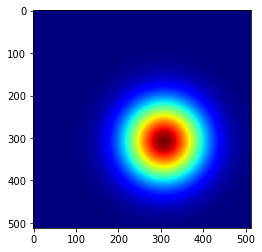

In [93]:
image_path = '800_5_541_pos2_beam.jpg'

image = cv2.imread(image_path)
#print(image.shape)
cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#print(gray.dtype)
plt.imshow(cv_rgb)
#plt.imshow(gray)

print(cv_rgb.shape)

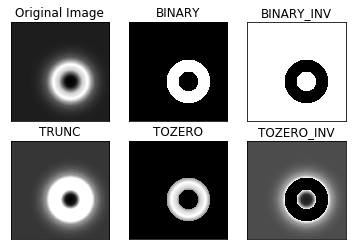

In [94]:
#a,image = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gray, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [101]:
import cv2

#contours, hierarchy = cv2.findContours(thresh1, 1, 2)
im2, contours, hierarchy = cv2.findContours(thresh3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


moments  = [cv2.moments(cnt) for cnt in contours]
# Nota Bene: I rounded the centroids to integer.
centroids = [( int(round(m['m10']/m['m00'])),int(round(m['m01']/m['m00'])) ) for m in moments]

print(centroids)




[(256, 256)]


In [103]:
def figfile_generator(path):
    process = Popen(["ls"], cwd=path, stdout=PIPE, stderr=PIPE)
    #to return the values 
    arr = []
    process_stdout = process.communicate()[0].decode('utf-8').splitlines()
    for l in process_stdout:
        if '.jpg' in str(l) and 'beam_2.jpg' not in str(l):
            arr.append(str(l))
    return (arr)


beam_files_list= figfile_generator(path)

def centroid_extractor(imagefiles):
    result_centroids = []
    for curr_image in imagefiles:
        #t_image = cv2.imread(i)
        t_igray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        ret,t_thresh = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
        im2, contours, hierarchy = cv2.findContours(t_thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        t_moments  = [cv2.moments(cnt) for cnt in contours]
        # Nota Bene: I rounded the centroids to integer.
        centroids = [( int(round(m['m10']/m['m00'])),int(round(m['m01']/m['m00'])) ) for m in moments]
        result_centroids.append(centroids)
    return(result_centroids)

centroid_extractor(beam_files_list)


[[(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)],
 [(256, 256)]]